In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import ConfigSpace as CS

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score, make_scorer

In [126]:
import sklearn
temp1 = sklearn.utils.check_random_state(None)
print(temp1)
temp2 = sklearn.utils.check_random_state(3)
print(temp2)
temp3 = sklearn.utils.check_random_state(temp2)
print(temp3)
# temp4 = sklearn.utils.check_random_state("seed")

RandomState(MT19937)
RandomState(MT19937)
RandomState(MT19937)


In [139]:
temp1.normal(), temp2.normal(), temp3.normal()

(1.8759493131407252, -0.04381816897592824, -0.47721803035950267)

In [130]:
import openml

automl_benchmark = openml.study.get_suite(218)
print(automl_benchmark)

OpenML Benchmark Suite
ID..............: 218
Name............: AutoML Benchmark
Status..........: in_preparation
Main Entity Type: task
Study URL.......: https://www.openml.org/s/218
# of Data.......: 42
# of Tasks......: 42
Creator.........: https://www.openml.org/u/869
Upload Time.....: 2019-05-02 13:35:08


In [3]:
# print(len(automl_benchmark.data))
# for did in automl_benchmark.data:
#     d = openml.datasets.get_dataset(did, download_data=False)
#     print(d ,"\n")

In [4]:
d = openml.datasets.get_dataset(1471)

In [5]:
# dataset_id=1471 is EEG data

automl_stats = pd.DataFrame(0, index=np.arange(len(automl_benchmark.data)), 
                            columns=['dataset_id', 'dataset_name', '# categoricals', 
                                     '# total features', '# instances', '# classes', 
                                     'minority class size'])
for i, did in enumerate(automl_benchmark.data):
    print("{}/{}".format(i+1, len(automl_benchmark.data)), end='\r')
    d = openml.datasets.get_dataset(did, download_data=False)    
    automl_stats.iloc[i] = [did, d.name, d.qualities['NumberOfSymbolicFeatures'], 
                            d.qualities['NumberOfFeatures'], d.qualities['NumberOfInstances'], 
                            d.qualities['NumberOfClasses'], d.qualities['MinorityClassSize']]

automl_stats

,dataset_id,dataset_name,# categoricals,# total features,# instances,# classes,minority class size
0,1,anneal,33.0,39.0,898.0,5.0,8.0
1,2,anneal,33.0,39.0,898.0,5.0,8.0
2,3,kr-vs-kp,37.0,37.0,3196.0,2.0,1527.0
3,5,arrhythmia,74.0,280.0,452.0,13.0,2.0
4,12,mfeat-factors,1.0,217.0,2000.0,10.0,200.0
5,31,credit-g,14.0,21.0,1000.0,2.0,300.0
6,54,vehicle,1.0,19.0,846.0,4.0,199.0
7,1067,kc1,1.0,22.0,2109.0,2.0,326.0
8,1111,KDDCup09_appetency,39.0,231.0,50000.0,2.0,890.0
9,1590,adult,9.0,15.0,48842.0,2.0,11687.0


In [222]:
task_ids = [
        3, 
        168335, 
        168331,     
        31,   
        9977
]

for task_id in task_ids:
    try:
        t = openml.tasks.get_task(task_id, download_data=False)
        d = openml.datasets.get_dataset(t.dataset_id, download_data=False)
        print(t, "\n", d.name)
        print()
    except:
        print("Failed for task_id={}".format(task_id))

OpenML Classification Task
Task Type Description: https://www.openml.org/tt/1
Task ID..............: 3
Task URL.............: https://www.openml.org/t/3
Estimation Procedure.: crossvalidation
Target Feature.......: class
# of Classes.........: 2
Cost Matrix..........: Available 
 kr-vs-kp

OpenML Classification Task
Task Type Description: https://www.openml.org/tt/1
Task ID..............: 168335
Task URL.............: https://www.openml.org/t/168335
Estimation Procedure.: crossvalidation
Evaluation Measure...: area_under_roc_curve
Target Feature.......: signal
# of Classes.........: 2
Cost Matrix..........: Available 
 MiniBooNE

OpenML Classification Task
Task Type Description: https://www.openml.org/tt/1
Task ID..............: 168331
Task URL.............: https://www.openml.org/t/168331
Estimation Procedure.: crossvalidation
Evaluation Measure...: mean_class_complexity
Target Feature.......: class
# of Classes.........: 10
Cost Matrix..........: Available 
 volkert

OpenML Classific

In [221]:
d = openml.datasets.get_dataset(t.dataset_id, download_data=False)

In [113]:


class RandomForestBenchmark():

    def __init__(self, task_id=None, valid_size=0.33, seed=None):
        self.task_id = task_id
        self.valid_size = valid_size
        self.seed = seed
        self.cs = self.get_param_space()
        self.f_cs = self.get_fidelity_space()

    def get_param_space(self):
        cs = CS.ConfigurationSpace(seed=self.seed)

        cs.add_hyperparameters([
            CS.UniformIntegerHyperparameter('max_depth', lower=1, upper=15,
                                            default_value=5, log=False),
            CS.UniformFloatHyperparameter('min_samples_split', lower=0.01,
                                          upper=0.99, default_value=0.01, log=True),
            CS.UniformFloatHyperparameter('max_features', lower=0.01, upper=0.99,
                                          default_value=0.33, log=True),
            # TODO: check variance in performance with these parameters included
            # CS.UniformFloatHyperparameter('min_samples_leaf', lower=0.01,
            #                                upper=0.49, default_value=0.01, log=True),
            # CS.UniformFloatHyperparameter('min_weight_fraction_leaf', lower=0.01,
            #                                upper=0.49, default_value=0.01, log=True),
            # CS.UniformFloatHyperparameter('min_impurity_decrease', lower=0.0,
            #                                upper=0.5, default_value=0.0, log=False)
        ])
        return cs

    def get_fidelity_space(self):
        f_cs = CS.ConfigurationSpace(seed=self.seed)

        f_cs.add_hyperparameters([
            CS.UniformIntegerHyperparameter('n_estimators', lower=2, upper=100,
                                            default_value=10, log=False),
            CS.UniformFloatHyperparameter('subsample', lower=0.1,
                                          upper=1, default_value=0.33, log=False)
        ])
        return f_cs

    def get_config(self):
        return self.cs.sample_configuration()

    def get_fidelity(self):
        return self.f_cs.sample_configuration()

    def load_data_automl(self, verbose=False):

        # loads AutoML benchmark
        self.automl_benchmark = openml.study.get_suite(218)
        # if self.task_id is None:
        #     self.task_id = self.automl_benchmark.tasks[
        #         np.random.randint(len(automl_benchmark.tasks))
        #     ]
        self.task = openml.tasks.get_task(self.task_id, download_data=False)
        self.dataset = openml.datasets.get_dataset(self.task.dataset_id, download_data=False)
        if verbose:
            print(self.task, '\n')
            print(self.dataset, '\n')

        # loads full data
        X, y, categorical_ind, feature_names = self.dataset.get_data(
            target=self.task.target_name, dataset_format="dataframe"
        )
        categorical_ind = np.array(categorical_ind)
        (cat_idx,) = np.where(categorical_ind)
        (cont_idx,) = np.where(~categorical_ind)

        # splitting dataset into train and test (10% test)
        train_idx, test_idx = self.task.get_train_test_split_indices()
        train_X = X.iloc[train_idx]
        train_y = y.iloc[train_idx]
        self.test_X = X.iloc[test_idx]
        self.test_y = y.iloc[test_idx]

        # splitting training into training and validation
        self.train_X, self.valid_X, self.train_y, self.valid_y = train_test_split(
            train_X, train_y, test_size=self.valid_size, shuffle=True, stratify=train_y
        )

        # preprocessor to handle missing values, categorical columns encodings,
        #   and scaling numeric columns
        self.preprocessor = make_pipeline(
            ColumnTransformer([
                (
                    "cat",
                    make_pipeline(SimpleImputer(strategy="most_frequent"),
                                  OneHotEncoder(sparse=False,
                                                handle_unknown="ignore")),
                    cat_idx.tolist(),
                ),
                (
                    "cont",
                    make_pipeline(SimpleImputer(strategy="median"),
                                  StandardScaler()),
                    cont_idx.tolist(),
                )
            ])
        )
        # preprocessing the training set
        if verbose:
            print("Shape of data pre-preprocessing: {}".format(train_X.shape))
        self.train_X = self.preprocessor.fit_transform(self.train_X)
        self.valid_X = self.preprocessor.transform(self.valid_X)
        self.test_X = self.preprocessor.transform(self.test_X)
        if verbose:
            print("Shape of data post-preprocessing: {}".format(train_X.shape), "\n")

        if verbose:
            print("\nTraining data (X, y): ({}, {})".format(self.train_X.shape,
                                                            self.train_y.shape))
            print("Validation data (X, y): ({}, {})".format(self.valid_X.shape,
                                                            self.valid_y.shape))
            print("Test data (X, y): ({}, {})".format(self.test_X.shape,
                                                      self.test_y.shape))

            print("\nData loading complete!\n")

    def objective(self, config, fidelity):
        start = time.time()

        model = RandomForestClassifier(
            **config.get_dictionary(),
            n_estimators=fidelity['n_estimators'],
            # max_samples=fidelities['subsample'],
            bootstrap=True
        )
        # subsample here
        train_idx = np.random.choice(
            np.arange(len(self.train_X)), size=int(
                fidelity['subsample'] * len(self.train_X)
            )
        )
        model.fit(self.train_X[train_idx], self.train_y.iloc[train_idx])
        accuracy_scorer = make_scorer(accuracy_score)

        val_loss = 1 - accuracy_scorer(model, self.valid_X, self.valid_y)
        # TODO: should training loss be on the subsampled data ??
        train_loss = 1 - accuracy_scorer(model, self.train_X, self.train_y)
        test_loss = 1 - accuracy_scorer(model, self.test_X, self.test_y)

        del model
        end = time.time()

        return {
            'function_value': val_loss,
            'info': {
                'train_loss': train_loss,
                'test_loss': test_loss,
                'cost': end - start
            }
        }

In [114]:
bench = RandomForestBenchmark(task_id=31)

In [115]:
bench.load_data_automl(verbose=True)

OpenML Classification Task
Task Type Description: https://www.openml.org/tt/1
Task ID..............: 31
Task URL.............: https://www.openml.org/t/31
Estimation Procedure.: crossvalidation
Target Feature.......: class
# of Classes.........: 2
Cost Matrix..........: Available 

OpenML Dataset
Name..........: credit-g
Version.......: 1
Format........: ARFF
Upload Date...: 2014-04-06 23:21:47
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/31/credit-g.arff
OpenML URL....: https://www.openml.org/d/31
# of features.: 21
# of instances: 1000 

Shape of data pre-preprocessing: (900, 20)
Shape of data post-preprocessing: (900, 20) 


Training data (X, y): ((603, 61), (603,))
Validation data (X, y): ((297, 61), (297,))
Test data (X, y): ((100, 61), (100,))

Data loading complete!



In [63]:
config = bench.cs.sample_configuration()
config

Configuration:
  max_depth, Value: 10
  max_features, Value: 0.19510178433282563
  min_samples_split, Value: 0.25191593063599393

In [64]:
fidelity = bench.f_cs.sample_configuration()
fidelity

Configuration:
  n_estimators, Value: 71
  subsample, Value: 0.28260096330691525

In [69]:
bench.objective(config, fidelity)

{'function_value': 0.24579124579124578,
 'info': {'train_loss': 0.24543946932006633,
  'test_loss': 0.28,
  'cost': 0.13875913619995117}}

In [71]:
fidelity['n_estimators'] = 100
fidelity['subsample'] = 0.33
bench.objective(config, fidelity)

{'function_value': 0.26936026936026936,
 'info': {'train_loss': 0.26533996683250416,
  'test_loss': 0.31000000000000005,
  'cost': 0.16840887069702148}}

In [72]:
fidelity['n_estimators'] = 2
fidelity['subsample'] = 0.1
bench.objective(config, fidelity)

{'function_value': 0.367003367003367,
 'info': {'train_loss': 0.36650082918739635,
  'test_loss': 0.37,
  'cost': 0.025201797485351562}}

In [21]:
x = np.logspace(start=1, stop=2, endpoint=True, base=10.0, dtype=np.int)
(y,_) = np.linspace(start=0.1, stop=0.99, endpoint=True, retstep=0.1)
xgrid, ygrid = np.meshgrid(x, y)
z = np.zeros(xgrid.shape)

for i in range(len(x)):
    for j in range(len(y)):
        print(i, j, end='\r')
        res = bench.objective(config, fidelities={'n_estimators': x[i], 'subsample': y[j]})
        z[i, j] = res['function_value']

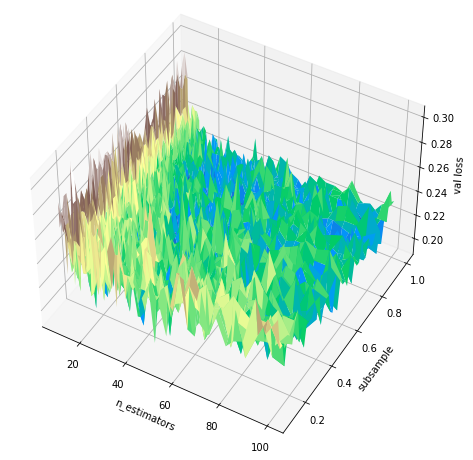

In [29]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -60)
ax.plot_surface(xgrid, ygrid, z, cstride=1, rstride=1, cmap='terrain')
ax.set_xlabel('n_estimators')
ax.set_ylabel('subsample')
ax.set_zlabel('val loss')

plt.show()

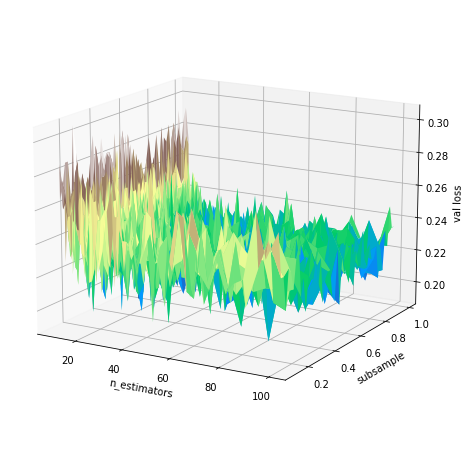

In [30]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(15, -60)
ax.plot_surface(xgrid, ygrid, z, cstride=1, rstride=1, cmap='terrain') #, cmap='terrain')
ax.set_xlabel('n_estimators')
ax.set_ylabel('subsample')
ax.set_zlabel('val loss')

plt.show()

# Random Search

In [97]:
def random_search(benchmark, iterations, verbose=False):
    results = []
    inc_config = None
    inc_fidelity = None
    inc_score = np.inf
    
    for i in range(1, iterations + 1):
        if verbose:
            print("Run {:<3}/{:<3}:".format(i, iterations), end=" ")
        config = benchmark.get_config()
        fidelity = benchmark.get_fidelity()
        result = benchmark.objective(config, fidelity)
        if result['function_value'] < inc_score:
            inc_score = result['function_value']
            inc_config = config
            inc_fidelity = fidelity
        results.append(result)
        if verbose:
            print(inc_score)
        
    return inc_score, inc_config, inc_fidelity, results

In [118]:
rf_bench = RandomForestBenchmark(task_id=54)
rf_bench.load_data_automl()

inc_score, inc_config, inc_fidelity, results = random_search(rf_bench, 100, verbose=False)

In [103]:
inc_score, inc_config, inc_fidelity

(0.08695652173913049,
 Configuration:
   max_depth, Value: 10
   max_features, Value: 0.15993156674597214
   min_samples_split, Value: 0.16525638969859155,
 Configuration:
   n_estimators, Value: 21
   subsample, Value: 0.4398986203765409)

In [85]:
len(results)

10

In [104]:
results

[{'function_value': 0.13043478260869568,
  'info': {'train_loss': 0.16129032258064513,
   'test_loss': 0.25,
   'cost': 0.02298903465270996}},
 {'function_value': 0.21739130434782605,
  'info': {'train_loss': 0.10752688172043012,
   'test_loss': 0.25,
   'cost': 0.03254866600036621}},
 {'function_value': 0.08695652173913049,
  'info': {'train_loss': 0.20430107526881724,
   'test_loss': 0.125,
   'cost': 0.028824567794799805}},
 {'function_value': 0.21739130434782605,
  'info': {'train_loss': 0.19354838709677424,
   'test_loss': 0.1875,
   'cost': 0.030194520950317383}},
 {'function_value': 0.21739130434782605,
  'info': {'train_loss': 0.19354838709677424,
   'test_loss': 0.1875,
   'cost': 0.12301158905029297}},
 {'function_value': 0.21739130434782605,
  'info': {'train_loss': 0.20430107526881724,
   'test_loss': 0.1875,
   'cost': 0.12323808670043945}},
 {'function_value': 0.13043478260869568,
  'info': {'train_loss': 0.11827956989247312,
   'test_loss': 0.125,
   'cost': 0.0154645442

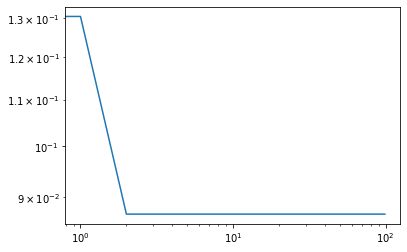

In [106]:
trajectory = []
inc = np.inf
for i, res in enumerate(results):
    if res['function_value'] < inc:
        inc = res['function_value']
    trajectory.append(inc)
    
plt.plot(trajectory)
plt.xscale('log')
plt.yscale('log')

In [109]:
rf_bench.task_id

54

In [119]:
rf_bench.task, rf_bench.dataset

(OpenML Classification Task
 Task Type Description: https://www.openml.org/tt/1
 Task ID..............: 54
 Task URL.............: https://www.openml.org/t/54
 Estimation Procedure.: crossvalidation
 Evaluation Measure...: predictive_accuracy
 Target Feature.......: Class
 # of Classes.........: 2
 Cost Matrix..........: Available,
 OpenML Dataset
 Name..........: hepatitis
 Version.......: 1
 Format........: ARFF
 Upload Date...: 2014-04-06 23:23:13
 Licence.......: Public
 Download URL..: https://www.openml.org/data/v1/download/55/hepatitis.arff
 OpenML URL....: https://www.openml.org/d/55
 # of features.: 20
 # of instances: 155)

In [120]:
rf_bench.dataset.dataset_id

55

In [228]:
hp = rf_bench.f_cs.get_hyperparameter('n_estimators')

In [244]:
hp = rf_bench.f_cs.get_hyperparameters()[0]

In [245]:
hp

n_estimators, Type: UniformInteger, Range: [2, 100], Default: 10

In [185]:
class RandomForestBenchmark():

    def __init__(self, task_id=None, valid_size=0.33, seed=None):
        self.task_id = task_id
        self.valid_size = valid_size
        self.seed = seed
        self.rand_state = check_random_state(self.seed)
        self.cs = self.get_param_space()
        self.f_cs = self.get_fidelity_space()

    def get_param_space(self):
        cs = CS.ConfigurationSpace(seed=self.seed)

        cs.add_hyperparameters([
            CS.UniformIntegerHyperparameter('max_depth', lower=1, upper=15,
                                            default_value=5, log=False),
            CS.UniformFloatHyperparameter('min_samples_split', lower=0.01,
                                          upper=0.99, default_value=0.01, log=True),
            CS.UniformFloatHyperparameter('max_features', lower=0.01, upper=0.99,
                                          default_value=0.33, log=True),
            # TODO: check variance in performance with these parameters included
            # CS.UniformFloatHyperparameter('min_samples_leaf', lower=0.01,
            #                                upper=0.49, default_value=0.01, log=True),
            # CS.UniformFloatHyperparameter('min_weight_fraction_leaf', lower=0.01,
            #                                upper=0.49, default_value=0.01, log=True),
            # CS.UniformFloatHyperparameter('min_impurity_decrease', lower=0.0,
            #                                upper=0.5, default_value=0.0, log=False)
        ])
        return cs

    def get_fidelity_space(self):
        f_cs = CS.ConfigurationSpace(seed=self.seed)

        f_cs.add_hyperparameters([
            CS.UniformIntegerHyperparameter('n_estimators', lower=2, upper=100,
                                            default_value=10, log=False),
            CS.UniformFloatHyperparameter('subsample', lower=0.1,
                                          upper=1, default_value=0.33, log=False)
        ])
        return f_cs

    def get_config(self):
        return self.cs.sample_configuration()

    def get_fidelity(self):
        return self.f_cs.sample_configuration()

    def load_data_automl(self, verbose=False):

        # loads AutoML benchmark
        self.automl_benchmark = openml.study.get_suite(218)
        # if self.task_id is None:
        #     self.task_id = self.automl_benchmark.tasks[
        #         np.random.randint(len(automl_benchmark.tasks))
        #     ]
        self.task = openml.tasks.get_task(self.task_id, download_data=False)
        self.dataset = openml.datasets.get_dataset(self.task.dataset_id, download_data=False)
        if verbose:
            print(self.task, '\n')
            print(self.dataset, '\n')

        # loads full data
        X, y, categorical_ind, feature_names = self.dataset.get_data(
            target=self.task.target_name, dataset_format="dataframe"
        )
        categorical_ind = np.array(categorical_ind)
        (cat_idx,) = np.where(categorical_ind)
        (cont_idx,) = np.where(~categorical_ind)

        # splitting dataset into train and test (10% test)
        train_idx, test_idx = self.task.get_train_test_split_indices()
        train_X = X.iloc[train_idx]
        train_y = y.iloc[train_idx]
        self.test_X = X.iloc[test_idx]
        self.test_y = y.iloc[test_idx]

        # splitting training into training and validation
        self.train_X, self.valid_X, self.train_y, self.valid_y = train_test_split(
            train_X, train_y, test_size=self.valid_size,
            shuffle=True, stratify=train_y, random_state=self.rand_state
        )

        # preprocessor to handle missing values, categorical columns encodings,
        #   and scaling numeric columns
        self.preprocessor = make_pipeline(
            ColumnTransformer([
                (
                    "cat",
                    make_pipeline(SimpleImputer(strategy="most_frequent"),
                                  OneHotEncoder(sparse=False,
                                                handle_unknown="ignore")),
                    cat_idx.tolist(),
                ),
                (
                    "cont",
                    make_pipeline(SimpleImputer(strategy="median"),
                                  StandardScaler()),
                    cont_idx.tolist(),
                )
            ])
        )
        # preprocessing the training set
        if verbose:
            print("Shape of data pre-preprocessing: {}".format(train_X.shape))
        self.train_X = self.preprocessor.fit_transform(self.train_X)
        self.valid_X = self.preprocessor.transform(self.valid_X)
        self.test_X = self.preprocessor.transform(self.test_X)
        if verbose:
            print("Shape of data post-preprocessing: {}".format(train_X.shape), "\n")

        if verbose:
            print("\nTraining data (X, y): ({}, {})".format(self.train_X.shape,
                                                            self.train_y.shape))
            print("Validation data (X, y): ({}, {})".format(self.valid_X.shape,
                                                            self.valid_y.shape))
            print("Test data (X, y): ({}, {})".format(self.test_X.shape,
                                                      self.test_y.shape))

            print("\nData loading complete!\n")

    def objective(self, config, fidelity):
        start = time.time()

        model = RandomForestClassifier(
            **config.get_dictionary(),
            n_estimators=fidelity['n_estimators'],
            # max_samples=fidelities['subsample'],
            bootstrap=True,
            random_state=self.rand_state
        )
        # subsample here
        train_idx = self.rand_state.choice(
            np.arange(len(self.train_X)), size=int(
                fidelity['subsample'] * len(self.train_X)
            )
        )
        model.fit(self.train_X[train_idx], self.train_y.iloc[train_idx])
        accuracy_scorer = make_scorer(accuracy_score)

        val_loss = 1 - accuracy_scorer(model, self.valid_X, self.valid_y)
        # TODO: should training loss be on the subsampled data ??
        train_loss = 1 - accuracy_scorer(model, self.train_X, self.train_y)
        test_loss = 1 - accuracy_scorer(model, self.test_X, self.test_y)

        del model
        end = time.time()

        return {
            'function_value': val_loss,
            'info': {
                'train_loss': train_loss,
                'test_loss': test_loss,
                'cost': end - start,
                'fidelity': fidelity,
                'config': config
            }
        }

    def objective_test(self, config, fidelity):
        start = time.time()

        model = RandomForestClassifier(
            **config.get_dictionary(),
            n_estimators=fidelity['n_estimators'],
            # max_samples=fidelities['subsample'],
            bootstrap=True,
            random_state=self.rand_state
        )
        # subsample here
        train_idx = self.rand_state.choice(
            np.arange(len(self.train_X)), size=int(
                fidelity['subsample'] * len(self.train_X)
            )
        )
        training_X = np.concatenate((self.train_X, self.valid_X), axis=0)
        training_y = np.concatenate((self.train_y, self.valid_y), axis=0)
        model.fit(training_X, training_y)
        accuracy_scorer = make_scorer(accuracy_score)

        val_loss = 1 - accuracy_scorer(model, self.valid_X, self.valid_y)
        # TODO: should training loss be on the subsampled data ??
        train_loss = 1 - accuracy_scorer(model, training_X, training_y)
        test_loss = 1 - accuracy_scorer(model, self.test_X, self.test_y)

        del model
        end = time.time()

        return {
            'function_value': test_loss,
            'info': {
                'train_loss': train_loss,
                'cost': end - start,
                'fidelity': fidelity,
                'config': config
            }
        }

In [186]:
rf_bench = RandomForestBenchmark(task_id=54)
rf_bench.load_data_automl()

In [160]:
rf_bench.train_X.shape, rf_bench.valid_X.shape

((93, 32), (46, 32))

In [187]:
config = rf_bench.cs.sample_configuration()
fidelity = rf_bench.f_cs.sample_configuration()

In [188]:
rf_bench.objective(config, fidelity)

{'function_value': 0.17391304347826086,
 'info': {'train_loss': 0.17204301075268813,
  'test_loss': 0.0,
  'cost': 0.0963294506072998,
  'fidelity': Configuration:
    n_estimators, Value: 53
    subsample, Value: 0.46065790680209373,
  'config': Configuration:
    max_depth, Value: 4
    max_features, Value: 0.4579678989516072
    min_samples_split, Value: 0.04931342445213619}}

In [189]:
rf_bench.objective_test(config, fidelity)

{'function_value': 0.125,
 'info': {'train_loss': 0.05035971223021585,
  'cost': 0.11247420310974121,
  'fidelity': Configuration:
    n_estimators, Value: 53
    subsample, Value: 0.46065790680209373,
  'config': Configuration:
    max_depth, Value: 4
    max_features, Value: 0.4579678989516072
    min_samples_split, Value: 0.04931342445213619}}

In [284]:
fidelity_grid = []
fidelity_space_granularity = 100
eps=1e-10
for i, parameter in enumerate(rf_bench.f_cs.get_hyperparameters()):
    fidelity_grid.append(
        np.arange(start=parameter.lower, stop=parameter.upper + eps, 
                  step=(parameter.upper - parameter.lower) / fidelity_space_granularity)
    )
    fidelity_grid[-1][-1] = np.clip(fidelity_grid[-1][-1], 
                                    a_min=None, a_max=parameter.upper)

In [285]:
rf_bench.f_cs

Configuration space object:
  Hyperparameters:
    n_estimators, Type: UniformInteger, Range: [2, 100], Default: 10
    subsample, Type: UniformFloat, Range: [0.1, 1.0], Default: 0.33

In [286]:
print(len(fidelity_grid[0]), fidelity_grid[0][0], fidelity_grid[0][-1])
print(len(fidelity_grid[1]), fidelity_grid[1][0], fidelity_grid[1][-1])

101 2.0 100.0
101 0.1 1.0


In [321]:
import itertools

temp = itertools.product(*fidelity_grid)
for i, elem in enumerate(temp):
    pass
print(i)

10200


In [328]:
rf_bench.f_cs.get_hyperparameters()

[n_estimators, Type: UniformInteger, Range: [2, 100], Default: 10,
 subsample, Type: UniformFloat, Range: [0.1, 1.0], Default: 0.33]

In [330]:
fidelity.get_dictionary()

{'n_estimators': 53, 'subsample': 0.46065790680209373}

In [332]:
class RandomForestBenchmark():

    def __init__(self, task_id=None, valid_size=0.33, seed=None):
        self.task_id = task_id
        self.valid_size = valid_size
        self.seed = seed
        self.rand_state = check_random_state(self.seed)
        self.cs = self.get_param_space()
        self.f_cs = self.get_fidelity_space()

    def get_param_space(self):
        cs = CS.ConfigurationSpace(seed=self.seed)

        cs.add_hyperparameters([
            CS.UniformIntegerHyperparameter('max_depth', lower=1, upper=15,
                                            default_value=5, log=False),
            CS.UniformFloatHyperparameter('min_samples_split', lower=0.01,
                                          upper=0.99, default_value=0.01, log=True),
            CS.UniformFloatHyperparameter('max_features', lower=0.01, upper=0.99,
                                          default_value=0.33, log=True),
            # TODO: check variance in performance with these parameters included
            # CS.UniformFloatHyperparameter('min_samples_leaf', lower=0.01,
            #                                upper=0.49, default_value=0.01, log=True),
            # CS.UniformFloatHyperparameter('min_weight_fraction_leaf', lower=0.01,
            #                                upper=0.49, default_value=0.01, log=True),
            # CS.UniformFloatHyperparameter('min_impurity_decrease', lower=0.0,
            #                                upper=0.5, default_value=0.0, log=False)
        ])
        return cs

    def get_fidelity_space(self):
        f_cs = CS.ConfigurationSpace(seed=self.seed)

        f_cs.add_hyperparameters([
            CS.UniformIntegerHyperparameter('n_estimators', lower=2, upper=100,
                                            default_value=10, log=False),
            CS.UniformFloatHyperparameter('subsample', lower=0.1,
                                          upper=1, default_value=0.33, log=False)
        ])
        return f_cs

    def get_config(self, size=None):
        if size is None:
            return self.cs.sample_configuration()
        return [self.cs.sample_configuration() for i in range(size)]

    def get_fidelity(self, size=None):
        if size is None:
            return self.f_cs.sample_configuration()
        return [self.f_cs.sample_configuration() for i in range(size)]

    def load_data_automl(self, verbose=False):

        # loads AutoML benchmark
        self.automl_benchmark = openml.study.get_suite(218)
        # if self.task_id is None:
        #     self.task_id = self.automl_benchmark.tasks[
        #         np.random.randint(len(automl_benchmark.tasks))
        #     ]
        self.task = openml.tasks.get_task(self.task_id, download_data=False)
        self.dataset = openml.datasets.get_dataset(self.task.dataset_id, download_data=False)
        if verbose:
            print(self.task, '\n')
            print(self.dataset, '\n')

        # loads full data
        X, y, categorical_ind, feature_names = self.dataset.get_data(
            target=self.task.target_name, dataset_format="dataframe"
        )
        categorical_ind = np.array(categorical_ind)
        (cat_idx,) = np.where(categorical_ind)
        (cont_idx,) = np.where(~categorical_ind)

        # splitting dataset into train and test (10% test)
        train_idx, test_idx = self.task.get_train_test_split_indices()
        train_X = X.iloc[train_idx]
        train_y = y.iloc[train_idx]
        self.test_X = X.iloc[test_idx]
        self.test_y = y.iloc[test_idx]

        # splitting training into training and validation
        self.train_X, self.valid_X, self.train_y, self.valid_y = train_test_split(
            train_X, train_y, test_size=self.valid_size,
            shuffle=True, stratify=train_y, random_state=self.rand_state
        )

        # preprocessor to handle missing values, categorical columns encodings,
        #   and scaling numeric columns
        self.preprocessor = make_pipeline(
            ColumnTransformer([
                (
                    "cat",
                    make_pipeline(SimpleImputer(strategy="most_frequent"),
                                  OneHotEncoder(sparse=False,
                                                handle_unknown="ignore")),
                    cat_idx.tolist(),
                ),
                (
                    "cont",
                    make_pipeline(SimpleImputer(strategy="median"),
                                  StandardScaler()),
                    cont_idx.tolist(),
                )
            ])
        )
        # preprocessing the training set
        if verbose:
            print("Shape of data pre-preprocessing: {}".format(train_X.shape))
        self.train_X = self.preprocessor.fit_transform(self.train_X)
        self.valid_X = self.preprocessor.transform(self.valid_X)
        self.test_X = self.preprocessor.transform(self.test_X)
        if verbose:
            print("Shape of data post-preprocessing: {}".format(train_X.shape), "\n")

        if verbose:
            print("\nTraining data (X, y): ({}, {})".format(self.train_X.shape,
                                                            self.train_y.shape))
            print("Validation data (X, y): ({}, {})".format(self.valid_X.shape,
                                                            self.valid_y.shape))
            print("Test data (X, y): ({}, {})".format(self.test_X.shape,
                                                      self.test_y.shape))

            print("\nData loading complete!\n")

    def objective(self, config, fidelity):
        start = time.time()

        model = RandomForestClassifier(
            **config.get_dictionary(),
            n_estimators=fidelity['n_estimators'],
            # max_samples=fidelities['subsample'],
            bootstrap=True,
            random_state=self.rand_state
        )
        # subsample here
        train_idx = self.rand_state.choice(
            np.arange(len(self.train_X)), size=int(
                fidelity['subsample'] * len(self.train_X)
            )
        )
        model.fit(self.train_X[train_idx], self.train_y.iloc[train_idx])
        accuracy_scorer = make_scorer(accuracy_score)

        val_loss = 1 - accuracy_scorer(model, self.valid_X, self.valid_y)
        # TODO: should training loss be on the subsampled data ??
        train_loss = 1 - accuracy_scorer(model, self.train_X, self.train_y)
        test_loss = 1 - accuracy_scorer(model, self.test_X, self.test_y)

        del model
        end = time.time()

        return {
            'function_value': val_loss,
            'info': {
                'train_loss': train_loss,
                'test_loss': test_loss,
                'cost': end - start,
                'fidelity': fidelity,
                'config': config
            }
        }

    def objective_test(self, config, fidelity):
        start = time.time()

        model = RandomForestClassifier(
            **config.get_dictionary(),
            n_estimators=fidelity['n_estimators'],
            # max_samples=fidelities['subsample'],
            bootstrap=True,
            random_state=self.rand_state
        )
        # no subsampling here
        # train_idx = self.rand_state.choice(
        #     np.arange(len(self.train_X)), size=int(
        #         fidelity['subsample'] * len(self.train_X)
        #     )
        # )
        training_X = np.concatenate((self.train_X, self.valid_X), axis=0)
        training_y = np.concatenate((self.train_y, self.valid_y), axis=0)
        model.fit(training_X, training_y)
        accuracy_scorer = make_scorer(accuracy_score)

        val_loss = 1 - accuracy_scorer(model, self.valid_X, self.valid_y)
        # TODO: should training loss be on the subsampled data ??
        train_loss = 1 - accuracy_scorer(model, training_X, training_y)
        test_loss = 1 - accuracy_scorer(model, self.test_X, self.test_y)

        del model
        end = time.time()

        return {
            'function_value': test_loss,
            'info': {
                'train_loss': train_loss,
                'cost': end - start,
                'fidelity': fidelity,
                'config': config
            }
        }

In [534]:
task_ids = [
    3,       # kr-vs-kp
#     168335,  # MiniBooNE
#     168331,  # volkert
#     31,      # credit-g
#     9977     # nomao
]

seed = np.random.randint(1, 1000)
n_configs = 5
fidelity_space_granularity = 10

results = {}

for task_id in task_ids:
    benchmark = RandomForestBenchmark(task_id=task_id, seed=seed)
    benchmark.load_data_automl()
    configs = benchmark.get_config(size=n_configs)
    fidelity_grid = []
    eps = 1e-10
    results[task_id] = []
    print("Beginning task_id={}\n{}\n".format(task_id, '='*25))
    for i, parameter in enumerate(benchmark.f_cs.get_hyperparameters()):
        if isinstance(parameter, CS.UniformIntegerHyperparameter) and \
            (parameter.upper - parameter.lower) < fidelity_space_granularity:
            step = 1
        else:
            step = (parameter.upper - parameter.lower) / \
                (fidelity_space_granularity - 1)
        
        grid_points = np.arange(
            start=parameter.lower, stop=parameter.upper + eps, step=step
        )
               
        if isinstance(parameter, CS.UniformIntegerHyperparameter):
            grid_points = np.ceil(grid_points).astype(int)
        
        grid_points = np.clip(grid_points, a_min=None, a_max=parameter.upper)
        fidelity_grid.append(grid_points)
    fidelity_grid.append(configs)
    fidelities = itertools.product(*fidelity_grid)
    
    for i, fidelity in enumerate(fidelities):
        dummy_fidelity = benchmark.f_cs.sample_configuration()
        print("Evaluating fidelity {} out of {}".format(
               i+1, n_configs * fidelity_space_granularity**2
        ), end='\r')
        config = fidelity[-1]
        for j, parameter in enumerate(benchmark.f_cs.get_hyperparameters()):
            dummy_fidelity[parameter.name] = fidelity[j]
        fidelity = dummy_fidelity
        results[task_id].append(benchmark.objective(config, fidelity))

Beginning task_id=3



In [535]:
len(results[3])

500

In [536]:
results[3][0]

{'function_value': 0.28421052631578947,
 'info': {'train_loss': 0.270508826583593,
  'test_loss': 0.275,
  'cost': 0.010608196258544922,
  'fidelity': Configuration:
    n_estimators, Value: 2
    subsample, Value: 0.1,
  'config': Configuration:
    max_depth, Value: 13
    max_features, Value: 0.047019030606209995
    min_samples_split, Value: 0.0256317336209487}}

In [537]:
results[3][-1]

{'function_value': 0.05894736842105264,
 'info': {'train_loss': 0.059709241952232595,
  'test_loss': 0.0625,
  'cost': 0.23595142364501953,
  'fidelity': Configuration:
    n_estimators, Value: 100
    subsample, Value: 1.0,
  'config': Configuration:
    max_depth, Value: 3
    max_features, Value: 0.2610395092040469
    min_samples_split, Value: 0.16344542123788972}}